In [1]:
%reload_ext autoreload
%autoreload 2
from pycocotools.coco import COCO
from pycocotools import cocoeval
import pandas as pd
import platform
from desc_results import load_coco
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 5.0)
from desc_results import desc_dataset
import seaborn as sns
import cv2

In [2]:
platform.system()

'Linux'

In [3]:
if platform.system()=='Linux':
    root_dir = "/root/autodl-tmp/pannuke_app"
else:
#     root_dir = "/home/pannuke_app"
    pass

In [4]:
coco = load_coco(f"{root_dir}/datasets/processed/CoNSeP/train/train_annotations.json")

loading annotations into memory...
Done (t=0.40s)
creating index...
index created!


In [7]:
coco.cats

{1: {'id': 1, 'name': 'Inflammatory', 'supercategory': 'CoNSeP'},
 2: {'id': 2, 'name': 'Healthy_epithelial', 'supercategory': 'CoNSeP'},
 3: {'id': 3, 'name': 'Epithelial', 'supercategory': 'CoNSeP'},
 4: {'id': 4, 'name': 'Spindle-shaped', 'supercategory': 'CoNSeP'}}

In [20]:
import pandas as pd
dataset_names =['consep', 'monusac','pannuke']
datasets = ['CoNSeP','MoNuSAC','PanNuke']
flags=['train', 'test']
# 准备数据列表
data = []
for dataset in datasets:
    for flag in flags:
        coco = load_coco(f"{root_dir}/datasets/processed/{dataset}/{flag}/{flag}_annotations.json")
        df = desc_dataset(coco, dataset, flag)

        # 假设 coco 是您已经加载的 COCO 数据集对象
        # cates 是一个字典，包含了类别的信息
        cates = coco.cats  # 获取类别信息

        

        # 遍历所有类别，获取每个类别的注解数量
        for cate_id, cate_info in cates.items():
            cate_name = cate_info['name']  # 获取类别名称
            ann_ids = coco.getAnnIds(catIds=cate_id)  # 获取当前类别的所有注解ID
            cnt = len(ann_ids)  # 计算注解数量
            data.append([dataset, flag, cate_name, cnt])  # 将数据添加到列表中

# 创建DataFrame
df = pd.DataFrame(data, columns=['dataset','flag', 'cate', 'cnt'])

# 显示DataFrame
print(df.head())  # 显示前几行以验证结果


loading annotations into memory...
Done (t=0.15s)
creating index...
index created!
loading annotations into memory...
Done (t=0.40s)
creating index...
index created!
loading annotations into memory...
Done (t=0.81s)
creating index...
index created!
loading annotations into memory...
Done (t=0.53s)
creating index...
index created!
loading annotations into memory...
Done (t=3.20s)
creating index...
index created!
loading annotations into memory...
Done (t=1.38s)
creating index...
index created!
  dataset   flag                cate   cnt
0  CoNSeP  train        Inflammatory   371
1  CoNSeP  train  Healthy_epithelial  3940
2  CoNSeP  train          Epithelial  5536
3  CoNSeP  train      Spindle-shaped  5704
4  CoNSeP   test        Inflammatory   561


In [22]:
df.to_csv("data/nucle_cate.csv", index=False)

In [ ]:
dataset_names =['consep', 'monusac','pannuke']
    datasets = ['CoNSeP','MoNuSAC','PanNuke']
    flags=['train', 'test']

    dfs = []

    # 在循环外部加载COCO数据集
    for dataset in datasets:
        for flag in flags:
            coco = load_coco(f"{root_dir}/datasets/processed/{dataset}/{flag}/{flag}_annotations.json")
            df = desc_dataset(coco, dataset, flag)
            dfs.append(df)

    # 使用 extend 避免创建新的 DataFrame
    res = pd.concat(dfs, ignore_index=True)

In [8]:
coco.anns

{1: {'id': 1,
  'image_id': 1,
  'category_id': 3,
  'iscrowd': 0,
  'area': 1539,
  'bbox': [249.0, 833.0, 69.0, 30.0],
  'segmentation': [[288.0,
    862.5,
    258.0,
    860.5,
    248.5,
    850.0,
    260.0,
    838.5,
    277.0,
    833.5,
    300.0,
    832.5,
    316.5,
    839.0,
    316.5,
    846.0,
    307.0,
    856.5,
    288.0,
    862.5]],
  'width': 1000,
  'height': 1000},
 2: {'id': 2,
  'image_id': 1,
  'category_id': 3,
  'iscrowd': 0,
  'area': 1343,
  'bbox': [233.0, 599.0, 27.0, 59.0],
  'segmentation': [[251.0,
    657.5,
    240.0,
    654.5,
    233.5,
    645.0,
    233.5,
    609.0,
    240.0,
    598.5,
    251.0,
    598.5,
    258.5,
    608.0,
    256.5,
    623.0,
    259.5,
    648.0,
    251.0,
    657.5]],
  'width': 1000,
  'height': 1000},
 3: {'id': 3,
  'image_id': 1,
  'category_id': 4,
  'iscrowd': 0,
  'area': 1341,
  'bbox': [949.0, 278.0, 29.0, 62.0],
  'segmentation': [[965.0,
    339.5,
    953.5,
    330.0,
    948.5,
    299.0,
    948

In [ ]:
# 根据coco 对象，查看该数据集中的具体信息
- 有多少张图片; coco.imgs 获取所有图片
- 每张图片有多少个细胞核

pannuke 中细胞核面积占比偏低, pannuke 细胞核数量密度中等; 细胞核平均面积中等，consep则偏小

In [11]:
# res.to_csv("data/desc_res.csv",index=False)

In [7]:
res = pd.read_csv("data/desc_res.csv")

Text(0.5, 0, '')

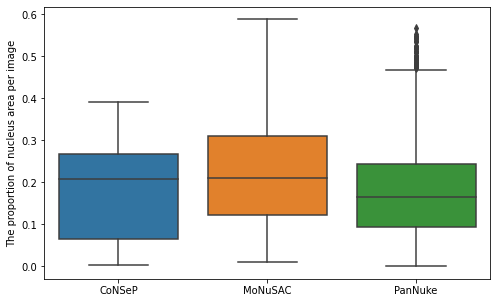

In [25]:
sns.boxplot(data=res, x='dataset',y='area_busy_rate')
plt.ylabel('The proportion of nucleus area per image')
plt.xlabel(None)

In [ ]:
res = pd.read_csv("data/desc_res.csv")
sns.boxplot(data=res, x='dataset',y='area_busy_rate')
plt.ylabel('The proportion of nucleus area per image')
plt.xlabel(None)

# pannuke 细胞核数量密度中等
sns.boxplot(data=res,x='dataset', y='avg_cnts')
plt.ylim((0, 0.01))
plt.xlabel(None)

# pannuke 细胞核平均面积中等，consep则偏小
sns.boxplot(data=res,x='dataset', y='areas')
plt.ylim((0, 3000))
plt.xlabel(None)

In [20]:
res.columns

Index(['imgs', 'cnts', 'areas', 'avg_cnts', 'area_sums', 'area_busy_rate',
       'dataset', 'flag'],
      dtype='object')

(0.0, 3000.0)

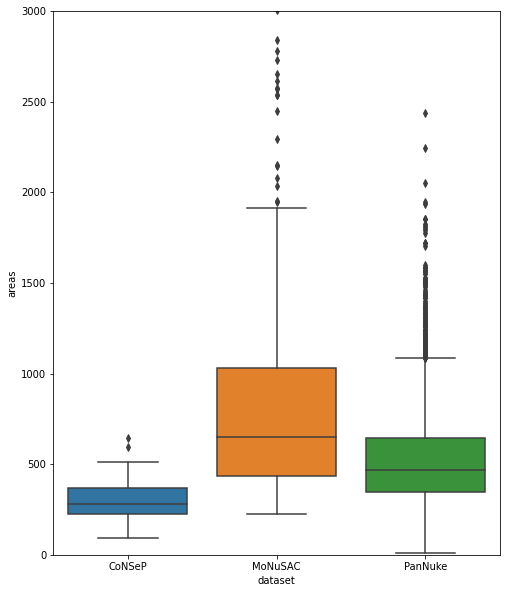

In [21]:
# pannuke 细胞核平均面积中等，consep则偏小
sns.boxplot(data=res,x='dataset', y='areas')
plt.ylim((0, 3000))

### 给几个指标分段
先看指标的分布情况，一般划分为三段
细胞核分布密度
细胞核大小
可以作为分段标准

In [27]:
res

,imgs,cnts,areas,avg_cnts,area_sums,area_busy_rate,dataset,flag
0,train_22.png,741,368.234818,0.002716,272862,0.272862,CoNSeP,train
1,train_23.png,1242,182.884058,0.005468,227142,0.227142,CoNSeP,train
2,train_21.png,261,344.969349,0.002899,90037,0.090037,CoNSeP,train
3,train_20.png,538,320.063197,0.003124,172194,0.172194,CoNSeP,train
4,train_24.png,767,279.122555,0.003583,214087,0.214087,CoNSeP,train
...,...,...,...,...,...,...,...,...
7903,test_997.png,10,494.800000,0.002021,4948,0.075500,PanNuke,test
7904,test_998.png,14,431.714286,0.002316,6044,0.092224,PanNuke,test
7905,test_999.png,17,413.705882,0.002417,7033,0.107315,PanNuke,test
7906,test_99.png,23,546.434783,0.001830,12568,0.191772,PanNuke,test


<AxesSubplot:>

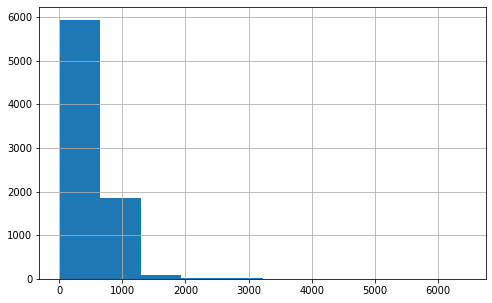

In [28]:
res.areas.hist()

In [30]:
df = res.copy()
# 分为4个分位数的段
df['areas_segmented'] = pd.qcut(df['areas'], 3)

In [31]:
df

,imgs,cnts,areas,avg_cnts,area_sums,area_busy_rate,dataset,flag,areas_segmented
0,train_22.png,741,368.234818,0.002716,272862,0.272862,CoNSeP,train,"(7.999, 389.448]"
1,train_23.png,1242,182.884058,0.005468,227142,0.227142,CoNSeP,train,"(7.999, 389.448]"
2,train_21.png,261,344.969349,0.002899,90037,0.090037,CoNSeP,train,"(7.999, 389.448]"
3,train_20.png,538,320.063197,0.003124,172194,0.172194,CoNSeP,train,"(7.999, 389.448]"
4,train_24.png,767,279.122555,0.003583,214087,0.214087,CoNSeP,train,"(7.999, 389.448]"
...,...,...,...,...,...,...,...,...,...
7903,test_997.png,10,494.800000,0.002021,4948,0.075500,PanNuke,test,"(389.448, 581.018]"
7904,test_998.png,14,431.714286,0.002316,6044,0.092224,PanNuke,test,"(389.448, 581.018]"
7905,test_999.png,17,413.705882,0.002417,7033,0.107315,PanNuke,test,"(389.448, 581.018]"
7906,test_99.png,23,546.434783,0.001830,12568,0.191772,PanNuke,test,"(389.448, 581.018]"


In [40]:
def segment_df(df, columns):
    for col in columns:
        quantile_bin_labels = [f'{col}_Q1', f'{col}_Q2', f'{col}_Q3']
        df[f'{col}_segmented'] = pd.qcut(df[col], 3, labels=quantile_bin_labels)
    return df

In [42]:
df_segmented = segment_df(df, columns=['areas','avg_cnts','area_busy_rate'])

In [44]:
df_segmented.to_csv("data/df_segmented.csv", index=False)

In [33]:
# 或者，分为3个分位数的段并指定标签
quantile_bin_labels = ['Q1', 'Q2', 'Q3']
df['areas_segmented'] = pd.qcut(df['areas'], 3, labels=quantile_bin_labels)

# 显示结果
df

,imgs,cnts,areas,avg_cnts,area_sums,area_busy_rate,dataset,flag,areas_segmented
0,train_22.png,741,368.234818,0.002716,272862,0.272862,CoNSeP,train,Q1
1,train_23.png,1242,182.884058,0.005468,227142,0.227142,CoNSeP,train,Q1
2,train_21.png,261,344.969349,0.002899,90037,0.090037,CoNSeP,train,Q1
3,train_20.png,538,320.063197,0.003124,172194,0.172194,CoNSeP,train,Q1
4,train_24.png,767,279.122555,0.003583,214087,0.214087,CoNSeP,train,Q1
...,...,...,...,...,...,...,...,...,...
7903,test_997.png,10,494.800000,0.002021,4948,0.075500,PanNuke,test,Q2
7904,test_998.png,14,431.714286,0.002316,6044,0.092224,PanNuke,test,Q2
7905,test_999.png,17,413.705882,0.002417,7033,0.107315,PanNuke,test,Q2
7906,test_99.png,23,546.434783,0.001830,12568,0.191772,PanNuke,test,Q2


In [35]:
df.groupby(['areas_segmented','dataset']).count()

imgs  cnts  areas  avg_cnts  area_sums  \
areas_segmented dataset                                           
Q1              CoNSeP     32    32     32        32         32   
                MoNuSAC    68    68     68        68         68   
                PanNuke  2536  2536   2536      2536       2536   
Q2              CoNSeP      7     7      7         7          7   
                MoNuSAC    58    58     58        58         58   
                PanNuke  2571  2571   2571      2571       2571   
Q3              CoNSeP      2     2      2         2          2   
                MoNuSAC   184   184    184       184        184   
                PanNuke  2450  2450   2450      2450       2450   

                         area_busy_rate  flag  
areas_segmented dataset                        
Q1              CoNSeP               32    32  
                MoNuSAC              68    68  
                PanNuke            2536  2536  
Q2              CoNSeP                7     7  
                MoNuSAC              58    58  
                PanNuke            2571  2571  
Q3              CoNSeP                2     2  
                MoNuSAC             184   184  
                PanNuke            2450  2450

(0.0, 0.01)

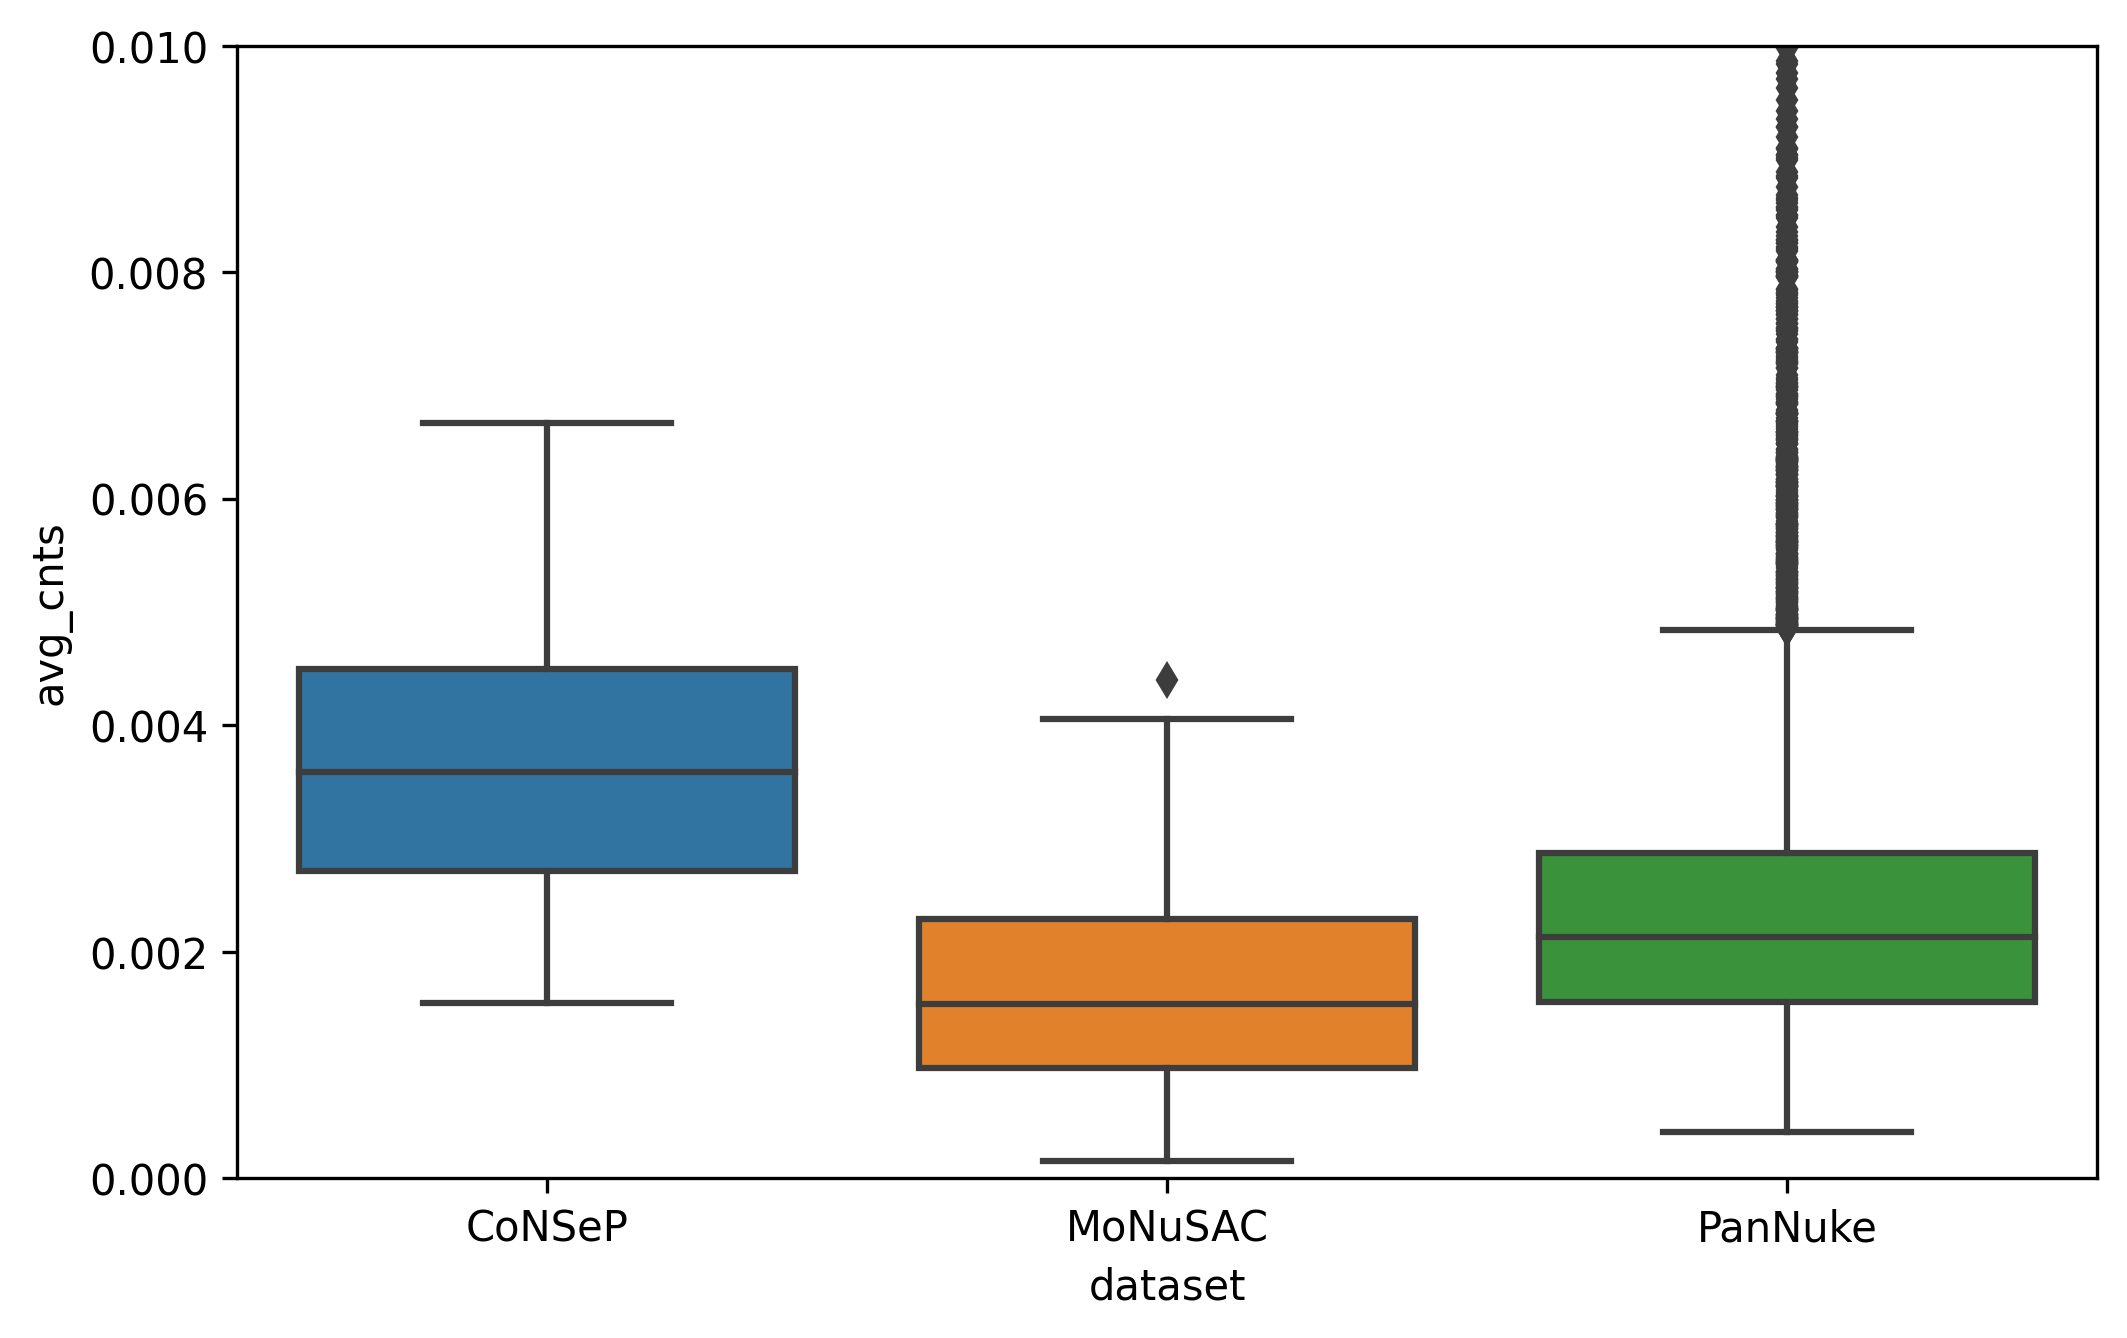

In [41]:
# pannuke 细胞核数量密度中等
plt.figure(dpi=300)
sns.boxplot(data=res,x='dataset', y='avg_cnts')
plt.ylim((0, 0.01))

In [22]:
# # pannuke 的细胞核大小在中间
# sns.boxplot(data=res,x='dataset', y='areas',hue='flag')
# plt.ylim((0, 3000))

In [29]:
res.columns

Index(['imgs', 'cnts', 'areas', 'avg_cnts', 'area_sums', 'area_busy_rate',
       'dataset', 'flag'],
      dtype='object')

(0.0, 1.0)

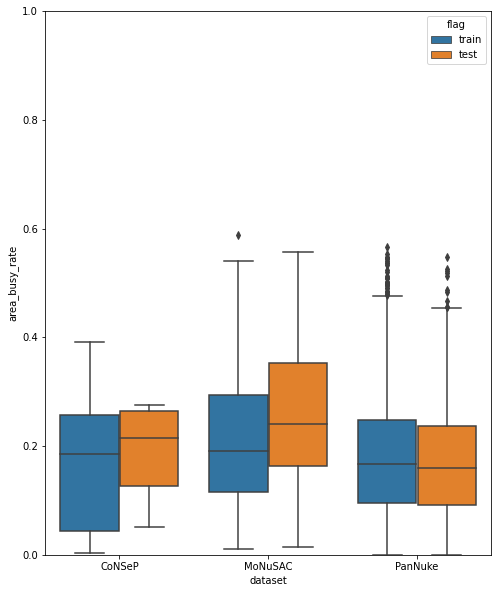

In [32]:
# pannuke 细胞核总面积中等，面积较为稀疏
sns.boxplot(data=res,x='dataset', y='area_busy_rate',hue='flag')
plt.ylim((0,1 ))

In [33]:
res.head()

,imgs,cnts,areas,avg_cnts,area_sums,area_busy_rate,dataset,flag
0,train_22.png,741,368.234818,0.002716,272862,0.272862,CoNSeP,train
1,train_23.png,1242,182.884058,0.005468,227142,0.227142,CoNSeP,train
2,train_21.png,261,344.969349,0.002899,90037,0.090037,CoNSeP,train
3,train_20.png,538,320.063197,0.003124,172194,0.172194,CoNSeP,train
4,train_24.png,767,279.122555,0.003583,214087,0.214087,CoNSeP,train


In [ ]:
## 对数据集本身的数据做表格呈现
### 图片分段分布

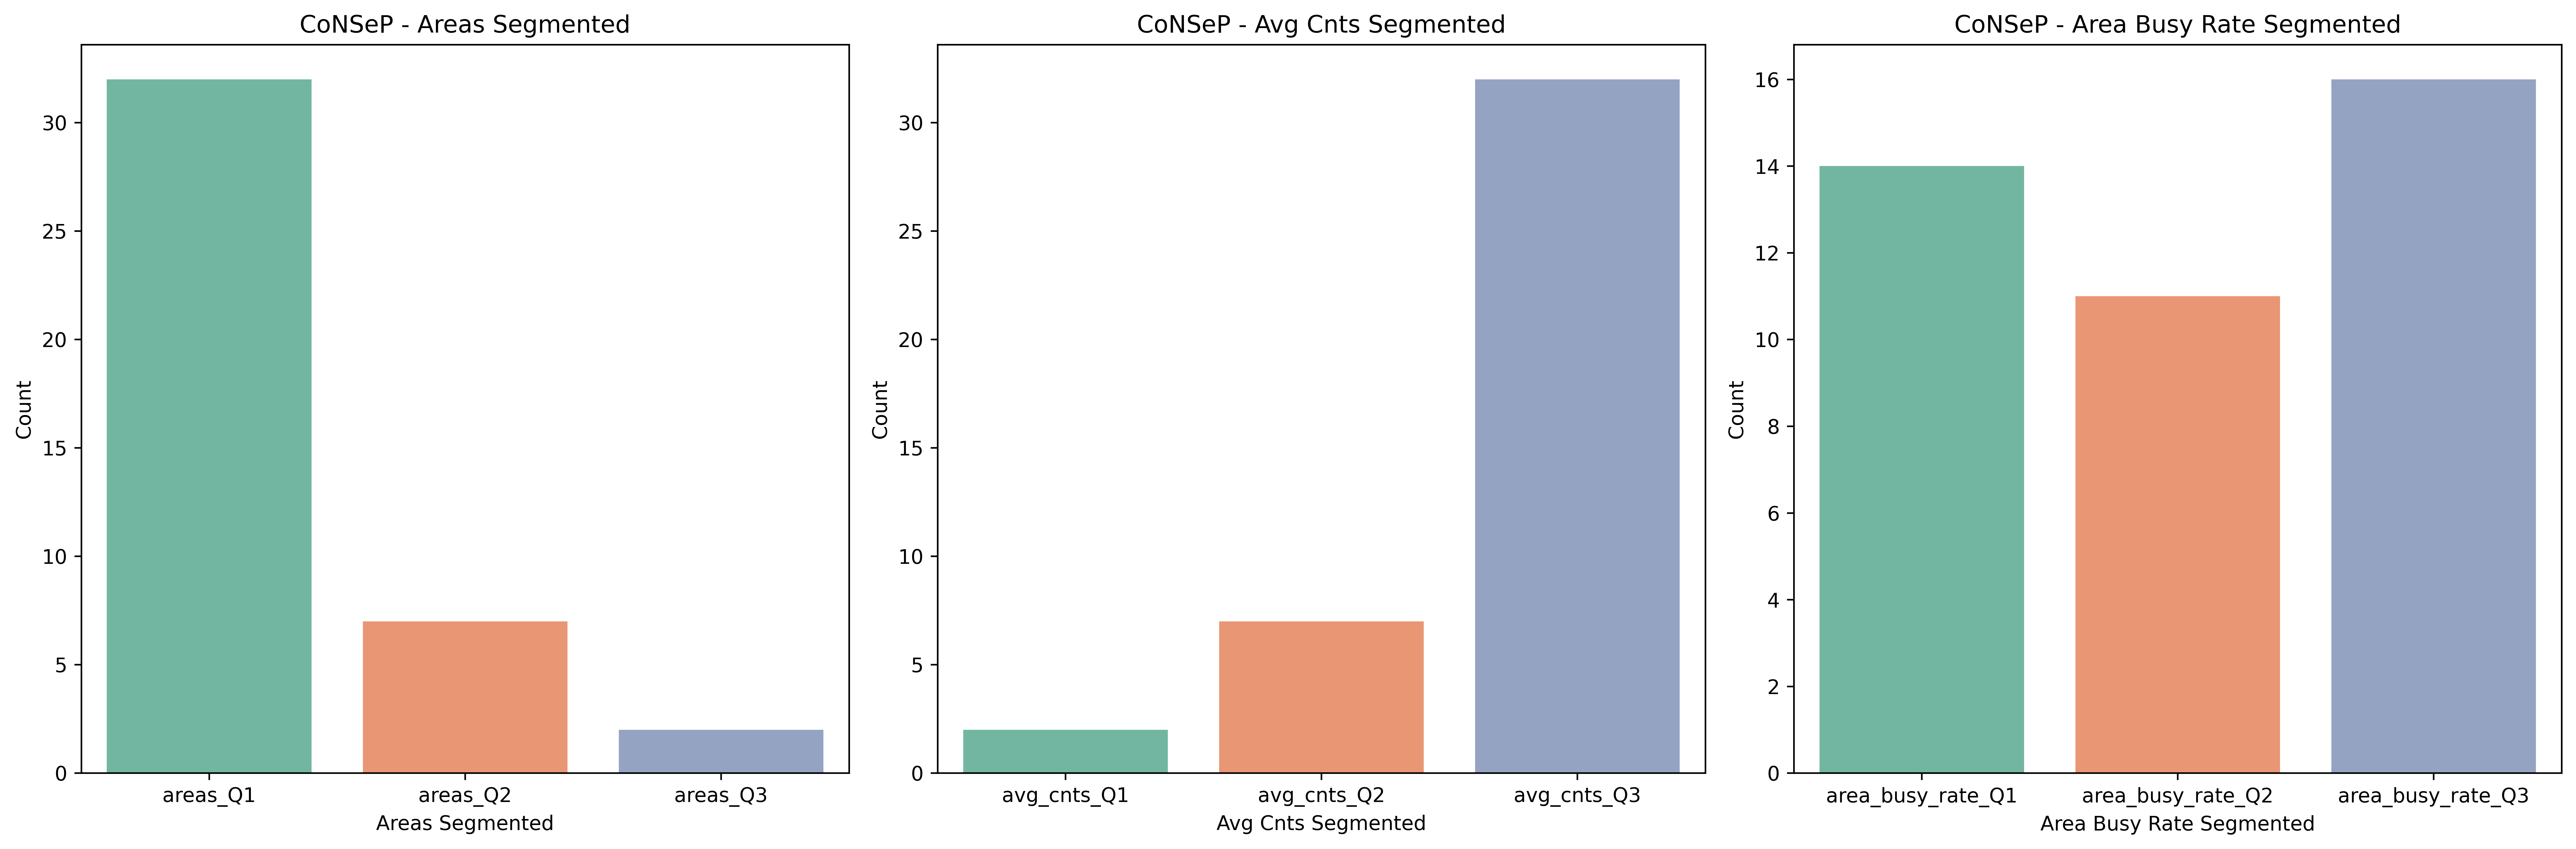

<Figure size 576x360 with 0 Axes>

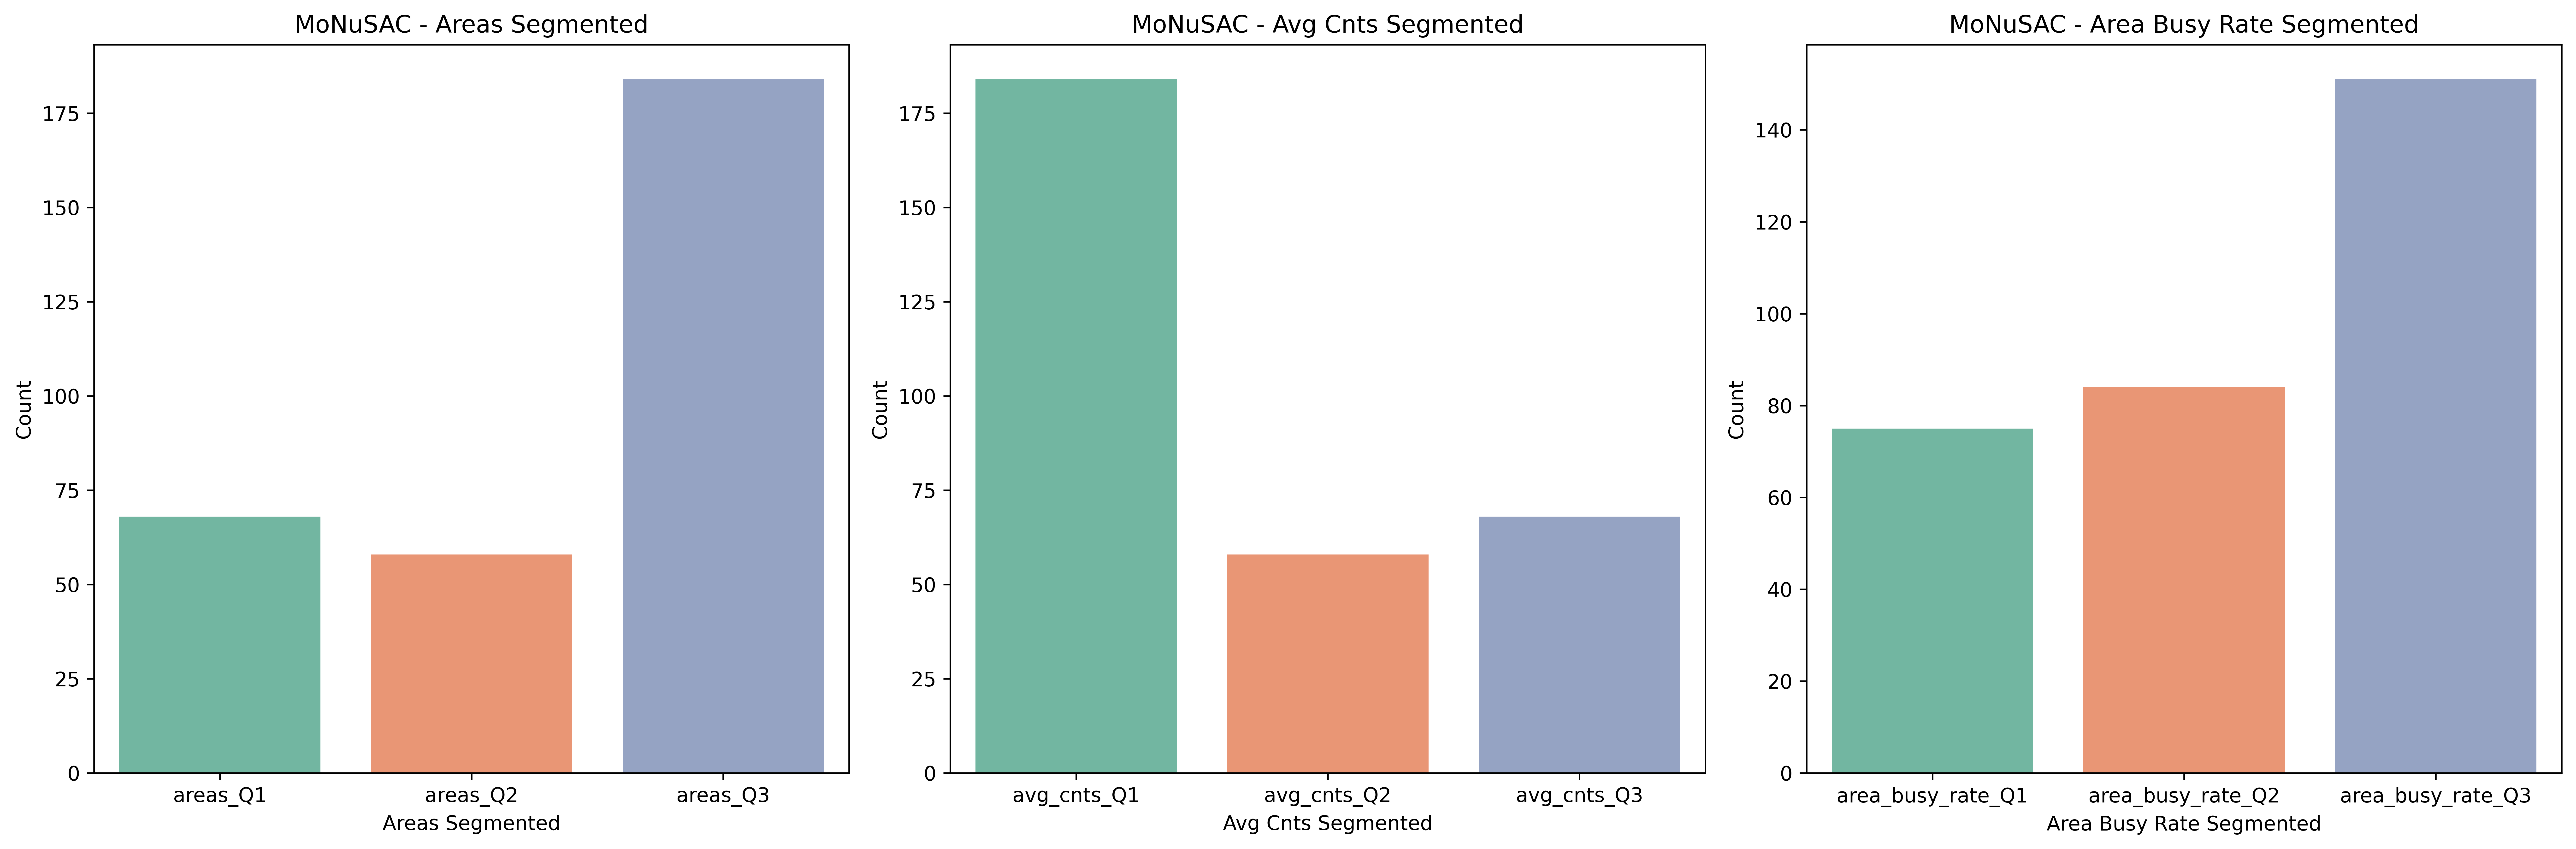

<Figure size 576x360 with 0 Axes>

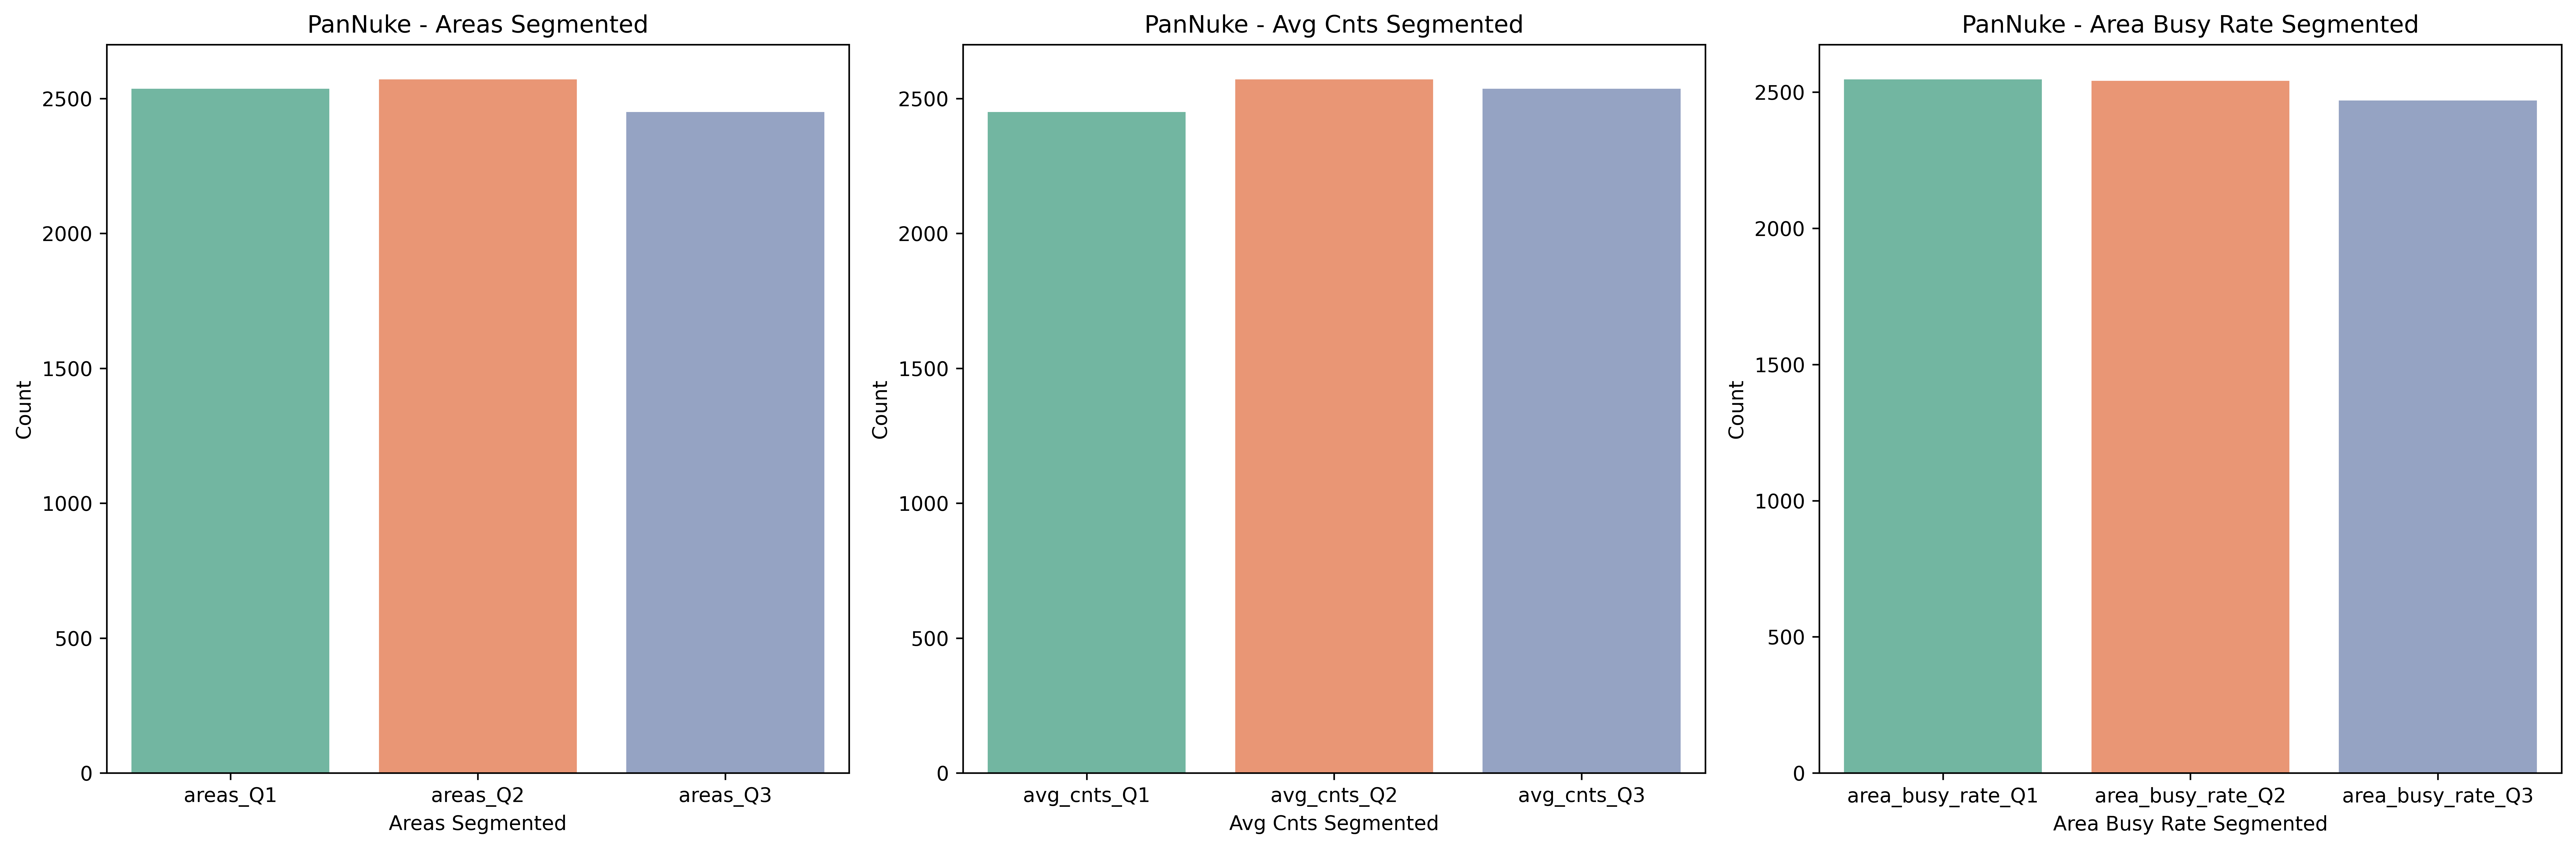

<Figure size 576x360 with 0 Axes>

In [48]:
# Function to plot all three metrics for each dataset in one figure with subplots
def plot_all_metrics_per_dataset(df, metrics, dataset,save_path):
    plt.figure(figsize=(18, 6),dpi=600)
    
    for i, metric in enumerate(metrics, 1):
        plt.subplot(1, 3, i)
        subset = df[df['dataset'] == dataset]
        order = sorted(subset[metric].unique())  # Sort the x labels
        sns.countplot(data=subset, x=metric, order=order, palette='Set2')
        plt.title(f'{dataset} - {metric.replace("_", " ").title()}')
        plt.xlabel(metric.replace('_', ' ').title())
        plt.ylabel('Count')
    
    plt.tight_layout()
    plt.savefig(save_path)
    plt.show()
    

# Metrics to plot
metrics = ['areas_segmented', 'avg_cnts_segmented', 'area_busy_rate_segmented']

# Plot for each dataset
for dataset in df['dataset'].unique():
    save_path=f'{dataset}_q_dist.png'
    plot_all_metrics_per_dataset(df, metrics, dataset, save_path)


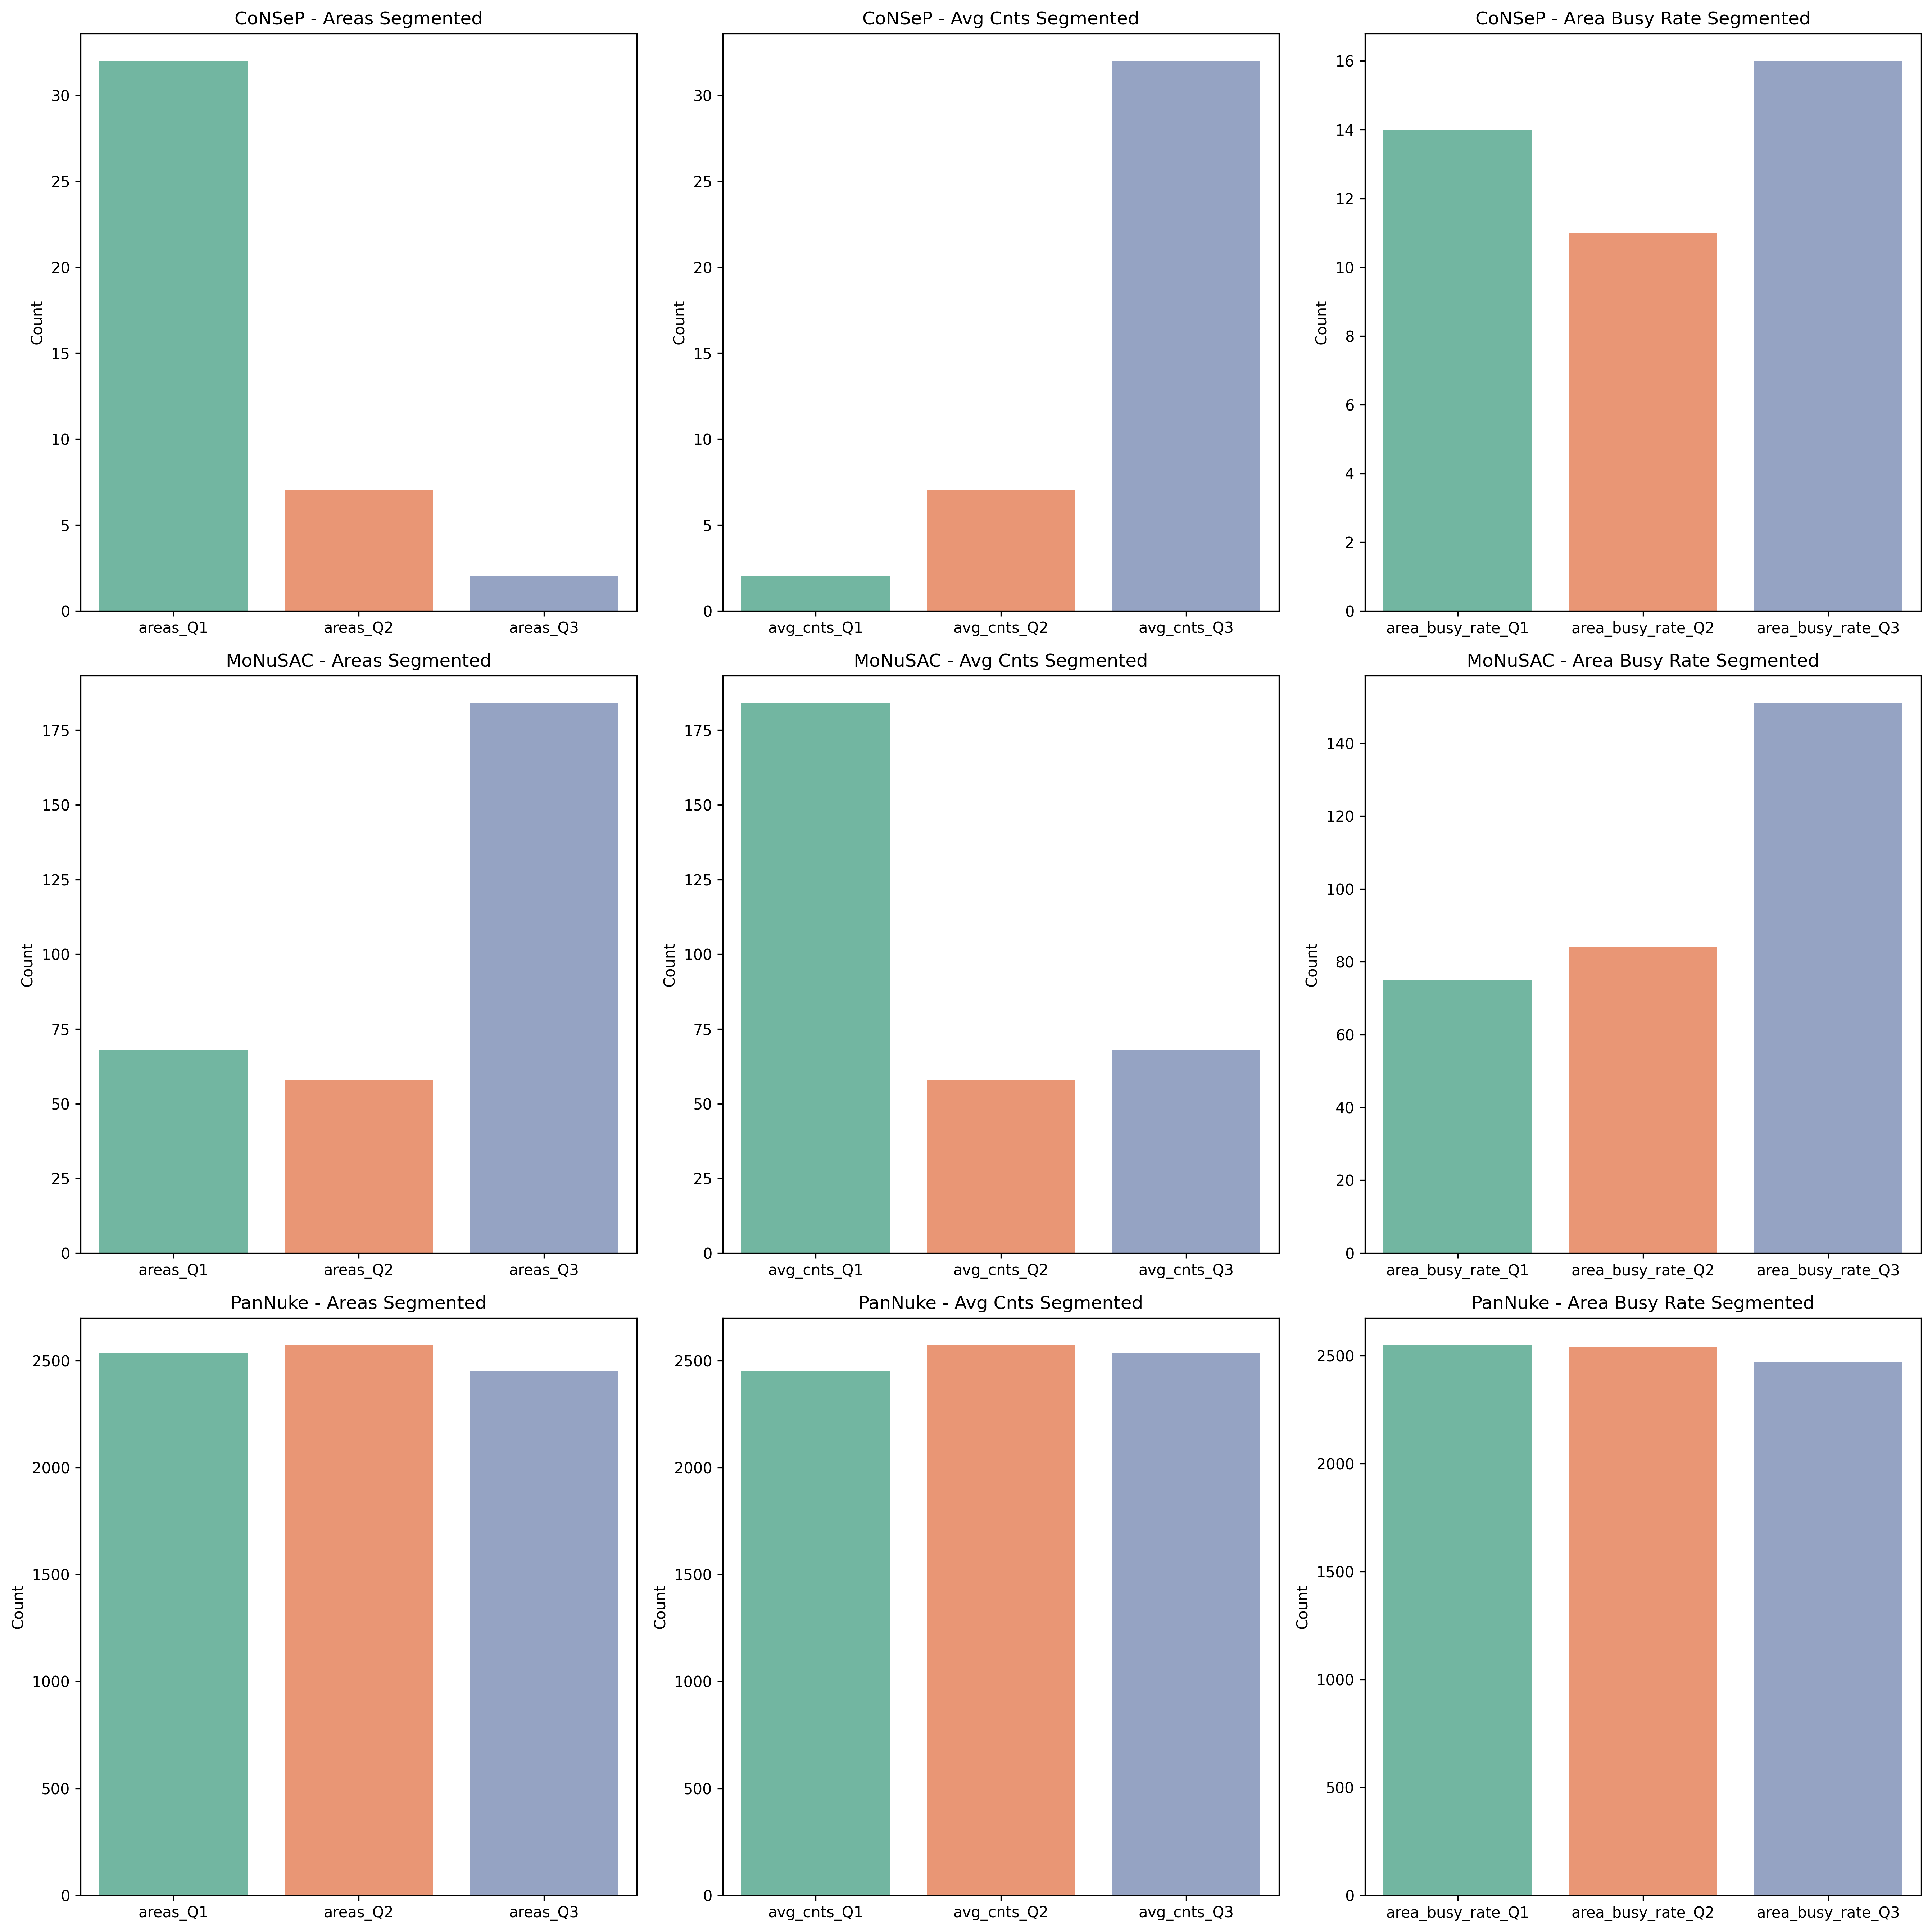

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_all_metrics_for_all_datasets(df, metrics, datasets, save_path):
    # 设置整个大图的尺寸
    fig, axes = plt.subplots(len(datasets), len(metrics), figsize=(18, 6 * len(datasets)), dpi=300)

    for i, dataset in enumerate(datasets):
        for j, metric in enumerate(metrics):
            subset = df[df['dataset'] == dataset]
            order = sorted(subset[metric].unique())  # 排序标签
            # 绘制子图
            sns.countplot(data=subset, x=metric, order=order, palette='Set2', ax=axes[i, j])
            axes[i, j].set_title(f'{dataset} - {metric.replace("_", " ").title()}')
#             axes[i, j].set_xlabel(metric.replace('_', ' ').title())
            axes[i, j].set_ylabel('Count')
            axes[i, j].set_xlabel(None)

    plt.tight_layout()
    plt.savefig(save_path)
    plt.show()

# Metrics and datasets
metrics = ['areas_segmented', 'avg_cnts_segmented', 'area_busy_rate_segmented']
datasets = df['dataset'].unique()

# Save path for the combined figure
save_path = 'all_datasets_q_dist.pdf'

# Generate and save the combined plot
plot_all_metrics_for_all_datasets(df, metrics, datasets, save_path)


### 细胞核类别分布

### 读取模型评估结果

In [ ]:
## 加载模型表现数据，并进行绘制

# 如何画出具体的案例？
## 如何画出带有预测结果的图？
参考mmdetectio, coco, ultralytics yolo

In [38]:
pic = "/root/autodl-tmp/pannuke_app/datasets/processed/PanNuke/train/imgs/train_1.png"

In [36]:
import matplotlib.image as mpimg

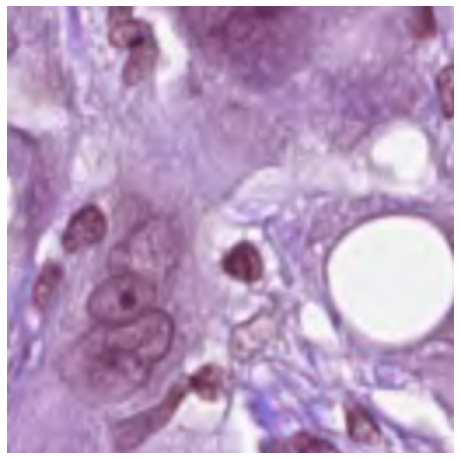

In [40]:
img = mpimg.imread(pic)
# 绘制图像
plt.imshow(img)
plt.axis('off')  # 关闭坐标轴
plt.show()

In [ ]:
## 把所有的分析结果关联上每张图，进行效果对比。
希望可以用 ultralytics hub 看一下不同的图的效果吧？

In [11]:
cocoDt = COCO(f"{root_dir}/datasets/processed/CoNSeP/train/train_annotations.json")

loading annotations into memory...
Done (t=0.25s)
creating index...
index created!


In [6]:
cocoGt = COCO("/home/pannuke_app/datasets/processed/CoNSeP/coco_annotations/test_annotations.json")

loading annotations into memory...
Done (t=0.05s)
creating index...
index created!


In [11]:
E = cocoeval.COCOeval(cocoGt,cocoDt); # initialize CocoEval object
# E.params.recThrs = ...;      # set parameters as desired
E.evaluate();                # run per image evaluation
E.accumulate();              # accumulate per image results
E.summarize();               # display summary metrics of results

Running per image evaluation...
Evaluate annotation type *segm*


KeyError: 'score'

# 加载 finetune on consep 的效果

In [2]:
path = "/root/autodl-tmp/pannuke_app/projects/finetune_consep_with_pn/yolov8/evaluation/yolov8.csv"

In [3]:
data = pd.read_csv(path)

In [4]:
data.shape

(2305, 9)

In [5]:
data.head()

,Unnamed: 0,dice,aji,0,1,average_dice,average_aji,average_map,average_map50
0,test_10_000.png,0.251276,0.206926,0.151398,0.327419,0.545721,0.468685,0.18767,0.384276
1,test_10_001.png,0.299119,0.320392,0.127749,0.358538,0.545721,0.468685,0.18767,0.384276
2,test_10_002.png,0.294619,0.256726,0.030471,0.072869,0.545721,0.468685,0.18767,0.384276
3,test_10_003.png,0.359488,0.288969,0.127209,0.257998,0.545721,0.468685,0.18767,0.384276
4,test_10_004.png,0.435956,0.318095,0.200673,0.365396,0.545721,0.468685,0.18767,0.384276


In [ ]:
path = "/root/autodl-tmp/pannuke_app/projects/finetune_consep_with_pn/yolov8/evaluation/yolov8.csv"

In [6]:
path = "/root/autodl-tmp/pannuke_app/projects/patched_consep/yolov8/evaluation/yolov8.csv"

In [7]:
data = pd.read_csv(path)

In [8]:
data.head()

,Unnamed: 0,dice,aji,0,1,average_dice,average_aji,average_map,average_map50
0,test_10_000.png,0.278745,0.227573,0.153300,0.351010,0.550066,0.465967,0.186816,0.377586
1,test_10_001.png,0.304036,0.343845,0.155945,0.410321,0.550066,0.465967,0.186816,0.377586
2,test_10_002.png,0.320588,0.335070,0.062971,0.157148,0.550066,0.465967,0.186816,0.377586
3,test_10_003.png,0.390382,0.360813,0.166882,0.330446,0.550066,0.465967,0.186816,0.377586
4,test_10_004.png,0.427490,0.363235,0.249921,0.477004,0.550066,0.465967,0.186816,0.377586


In [ ]:
# Monusac

In [ ]:
# hovernet
# hovernet 的 map 为什么这么低？

In [1]:
def head_info(path):
    data = pd.read_csv(path)
    print(data.head())

In [3]:
path = "/root/autodl-tmp/pannuke_app/projects/patched_monusac/hovernet/evaluation/hovernet.csv"

In [4]:
head_info(path)

                          Unnamed: 0      dice       aji         0         1  \
0  TCGA-2Z-A9JG-01Z-00-DX1_4_000.png  0.250696  0.065345  0.003960  0.019802   
1  TCGA-2Z-A9JG-01Z-00-DX1_4_001.png  0.363035  0.048242  0.047525  0.099010   
2  TCGA-2Z-A9JG-01Z-00-DX1_4_002.png  0.366664  0.096959  0.046535  0.099010   
3  TCGA-2Z-A9JG-01Z-00-DX1_4_003.png  0.423791  0.130141  0.040594  0.099010   
4  TCGA-2Z-A9JG-01Z-00-DX1_4_004.png  0.353056  0.164836  0.029109  0.067468   

   average_dice  average_aji  average_map  average_map50  
0      0.574341      0.28972     0.041879       0.082696  
1      0.574341      0.28972     0.041879       0.082696  
2      0.574341      0.28972     0.041879       0.082696  
3      0.574341      0.28972     0.041879       0.082696  
4      0.574341      0.28972     0.041879       0.082696  


In [ ]:
# yolo

In [5]:
path = "/root/autodl-tmp/pannuke_app/projects/patched_monusac/yolov8/evaluation/yolov8.csv"

In [6]:
head_info(path)

                          Unnamed: 0      dice       aji         0         1  \
0  TCGA-2Z-A9JG-01Z-00-DX1_4_000.png  0.399492  0.309096  0.366069  0.691730   
1  TCGA-2Z-A9JG-01Z-00-DX1_4_001.png  0.610232  0.472701  0.507026  0.852951   
2  TCGA-2Z-A9JG-01Z-00-DX1_4_002.png  0.671395  0.530982  0.580601  0.926980   
3  TCGA-2Z-A9JG-01Z-00-DX1_4_003.png  0.625042  0.587016  0.600357  0.922112   
4  TCGA-2Z-A9JG-01Z-00-DX1_4_004.png  0.625608  0.539577  0.498036  0.825990   

   average_dice  average_aji  average_map  average_map50  
0      0.711131     0.549172     0.349563       0.580072  
1      0.711131     0.549172     0.349563       0.580072  
2      0.711131     0.549172     0.349563       0.580072  
3      0.711131     0.549172     0.349563       0.580072  
4      0.711131     0.549172     0.349563       0.580072  


In [ ]:
# maskrcnn

In [7]:
path = "/root/autodl-tmp/pannuke_app/projects/monusac/maskrcnn/evaluation/maskrcnn.csv"

In [8]:
head_info(path)

                          Unnamed: 0      dice       aji         0         1  \
0  TCGA-2Z-A9JG-01Z-00-DX1_4_000.png  0.414232  0.274266  0.156219  0.328296   
1  TCGA-2Z-A9JG-01Z-00-DX1_4_001.png  0.477869  0.381922  0.441232  0.755982   
2  TCGA-2Z-A9JG-01Z-00-DX1_4_002.png  0.555049  0.470845  0.551947  0.866749   
3  TCGA-2Z-A9JG-01Z-00-DX1_4_003.png  0.611927  0.425959  0.497955  0.926073   
4  TCGA-2Z-A9JG-01Z-00-DX1_4_004.png  0.573839  0.431842  0.496066  0.811091   

   average_dice  average_aji  average_map  average_map50  
0      0.697155     0.468756     0.291397       0.478814  
1      0.697155     0.468756     0.291397       0.478814  
2      0.697155     0.468756     0.291397       0.478814  
3      0.697155     0.468756     0.291397       0.478814  
4      0.697155     0.468756     0.291397       0.478814  


# PanNuke

In [9]:
path = "/root/autodl-tmp/pannuke_app/projects/pannuke/maskrcnn/evaluation/maskrcnn.csv"

In [10]:
head_info(path)

   Unnamed: 0      dice       aji         0         1  average_dice  \
0  test_0.png  0.807542  0.370653  0.532285  0.896040      0.668277   
1  test_1.png  0.630833  0.151492  0.383360  0.565087      0.668277   
2  test_2.png  0.582515  0.247768  0.242356  0.440535      0.668277   
3  test_3.png  0.588300  0.327337  0.512308  0.875963      0.668277   
4  test_4.png  0.665735  0.304503  0.436164  0.737560      0.668277   

   average_aji  average_map  average_map50  
0     0.305838     0.256752       0.465983  
1     0.305838     0.256752       0.465983  
2     0.305838     0.256752       0.465983  
3     0.305838     0.256752       0.465983  
4     0.305838     0.256752       0.465983  


In [11]:
path = "/root/autodl-tmp/pannuke_app/projects/pannuke/yolov8/evaluation/yolov8.csv"
head_info(path)

      Unnamed: 0      dice       aji         0         1  average_dice  \
0     test_0.png  0.829935  0.663008  0.620132  0.917079      0.772229   
1     test_1.png  0.844758  0.497655  0.658705  0.886139      0.772229   
2    test_10.png  0.903665  0.716352  0.320627  0.396040      0.772229   
3   test_100.png  0.661418  0.628880  0.362167  0.574378      0.772229   
4  test_1000.png  0.736799  0.643497  0.421912  0.776049      0.772229   

   average_aji  average_map  average_map50  
0     0.635965     0.314756       0.538069  
1     0.635965     0.314756       0.538069  
2     0.635965     0.314756       0.538069  
3     0.635965     0.314756       0.538069  
4     0.635965     0.314756       0.538069  


In [12]:
path = "/root/autodl-tmp/pannuke_app/projects/pannuke/hovernet/evaluation/hovernet.csv"
head_info(path)

   Unnamed: 0      dice       aji         0         1  average_dice  \
0  test_0.png  0.838249  0.850104  0.600132  0.819661       0.76904   
1  test_1.png  0.632267  0.483377  0.190127  0.302652       0.76904   
2  test_2.png  0.543269  0.456638  0.185231  0.334158       0.76904   
3  test_3.png  0.554847  0.400927  0.294389  0.417492       0.76904   
4  test_4.png  0.876656  0.617295  0.528218  0.752475       0.76904   

   average_aji  average_map  average_map50  
0     0.678714     0.219575       0.399625  
1     0.678714     0.219575       0.399625  
2     0.678714     0.219575       0.399625  
3     0.678714     0.219575       0.399625  
4     0.678714     0.219575       0.399625  


In [ ]:
# Consep

In [16]:
path = "/root/autodl-tmp/pannuke_app/projects/patched_consep/maskrcnn/evaluation/maskrcnn2.csv"
head_info(path)

       Unnamed: 0      dice       aji         0         1  average_dice  \
0  test_1_000.png  0.312090  0.181216  0.074920  0.195039      0.492389   
1  test_1_001.png  0.304063  0.253292  0.122740  0.266574      0.492389   
2  test_1_002.png  0.287817  0.239622  0.093216  0.255931      0.492389   
3  test_1_003.png  0.306354  0.295081  0.110170  0.337113      0.492389   
4  test_1_004.png  0.309317  0.342320  0.145295  0.434393      0.492389   

   average_aji  average_map  average_map50  
0     0.385272     0.105014       0.246569  
1     0.385272     0.105014       0.246569  
2     0.385272     0.105014       0.246569  
3     0.385272     0.105014       0.246569  
4     0.385272     0.105014       0.246569  


In [17]:
path = "/root/autodl-tmp/pannuke_app/projects/patched_consep/yolov8/evaluation/yolov8.csv"
head_info(path)

        Unnamed: 0      dice       aji         0         1  average_dice  \
0  test_10_000.png  0.278745  0.227573  0.153300  0.351010      0.550066   
1  test_10_001.png  0.304036  0.343845  0.155945  0.410321      0.550066   
2  test_10_002.png  0.320588  0.335070  0.062971  0.157148      0.550066   
3  test_10_003.png  0.390382  0.360813  0.166882  0.330446      0.550066   
4  test_10_004.png  0.427490  0.363235  0.249921  0.477004      0.550066   

   average_aji  average_map  average_map50  
0     0.465967     0.186816       0.377586  
1     0.465967     0.186816       0.377586  
2     0.465967     0.186816       0.377586  
3     0.465967     0.186816       0.377586  
4     0.465967     0.186816       0.377586  


In [18]:
path = "/root/autodl-tmp/pannuke_app/projects/finetune_consep_with_pn/yolov8/evaluation/yolov8.csv"
head_info(path)

        Unnamed: 0      dice       aji         0         1  average_dice  \
0  test_10_000.png  0.245680  0.201878  0.144886  0.275775      0.556347   
1  test_10_001.png  0.292638  0.317705  0.190247  0.468306      0.556347   
2  test_10_002.png  0.301194  0.257213  0.034505  0.084379      0.556347   
3  test_10_003.png  0.372133  0.275428  0.165695  0.294013      0.556347   
4  test_10_004.png  0.436314  0.319205  0.166750  0.281971      0.556347   

   average_aji  average_map  average_map50  
0     0.453417     0.182132       0.363617  
1     0.453417     0.182132       0.363617  
2     0.453417     0.182132       0.363617  
3     0.453417     0.182132       0.363617  
4     0.453417     0.182132       0.363617  


# organs

In [19]:
path = "/root/autodl-tmp/pannuke_app/projects/pn_organ/split_v1/yolov8/evaluation/yolov8.csv"
head_info(path)

           Unnamed: 0      dice       aji         0         1  average_dice  \
0    test_fold1_0.png  0.786576  0.669678  0.111515  0.162280      0.698728   
1    test_fold1_1.png  0.662555  0.701510  0.186681  0.272239      0.698728   
2   test_fold1_10.png  0.000000  0.000000 -1.000000 -1.000000      0.698728   
3  test_fold1_100.png  0.771031  0.650243  0.338243  0.486386      0.698728   
4  test_fold1_101.png  0.922906  0.330340  0.236007  0.443234      0.698728   

   average_aji  average_map  average_map50  
0     0.536594     0.156243       0.268454  
1     0.536594     0.156243       0.268454  
2     0.536594     0.156243       0.268454  
3     0.536594     0.156243       0.268454  
4     0.536594     0.156243       0.268454  


In [20]:
path = "/root/autodl-tmp/pannuke_app/projects/pn_organ/split_v2/yolov8/evaluation/yolov8.csv"
head_info(path)

            Unnamed: 0      dice       aji         0         1  average_dice  \
0     test_fold1_0.png  0.735351  0.635182  0.269307  0.336634      0.788384   
1     test_fold1_1.png  0.516017  0.334094  0.239769  0.344059      0.788384   
2    test_fold1_10.png  0.750837  0.658955  0.276114  0.387376      0.788384   
3   test_fold1_100.png  0.887751  0.674505  0.242528  0.413319      0.788384   
4  test_fold1_1000.png  0.680726  0.631142  0.000000  0.000000      0.788384   

   average_aji  average_map  average_map50  
0       0.6075      0.17783       0.299981  
1       0.6075      0.17783       0.299981  
2       0.6075      0.17783       0.299981  
3       0.6075      0.17783       0.299981  
4       0.6075      0.17783       0.299981  


In [21]:
path = "/root/autodl-tmp/pannuke_app/projects/pn_organ/split_v3/yolov8/evaluation/yolov8.csv"
head_info(path)

           Unnamed: 0      dice       aji         0         1  average_dice  \
0    test_fold1_0.png  0.664931  0.616367  0.201966  0.312729      0.774082   
1    test_fold1_1.png  0.852522  0.566655  0.155145  0.198478      0.774082   
2   test_fold1_10.png  0.864994  0.631741  0.194675  0.354479      0.774082   
3  test_fold1_100.png  0.854745  0.288151  0.011881  0.024752      0.774082   
4  test_fold1_101.png  0.872698  0.525606  0.155938  0.278878      0.774082   

   average_aji  average_map  average_map50  
0     0.619369      0.20649       0.333893  
1     0.619369      0.20649       0.333893  
2     0.619369      0.20649       0.333893  
3     0.619369      0.20649       0.333893  
4     0.619369      0.20649       0.333893  
